# ASHS

In [1]:
SUBJECTS_DIR = '../tests/subjects'
SUBJECT = 'bert'

## Intracranial Volume

In [2]:
from freesurfer_volume_reader.ashs import IntracranialVolumeFile

for volume_file in IntracranialVolumeFile.find(SUBJECTS_DIR):
    if volume_file.subject == SUBJECT:
        print(volume_file.read_volume_mm3(), 'mm^3')

1234560.0 mm^3


## Subfield Volumes

In [3]:
import os
from freesurfer_volume_reader.ashs import HippocampalSubfieldsVolumeFile

volume_files = list(filter(lambda f: f.subject == SUBJECT, 
                           HippocampalSubfieldsVolumeFile.find(SUBJECTS_DIR)))
sorted(os.path.basename(f.absolute_path) for f in volume_files)

['bert_left_corr_nogray_volumes.txt',
 'bert_left_corr_usegray_volumes.txt',
 'bert_left_heur_volumes.txt',
 'bert_right_corr_nogray_volumes.txt']

In [4]:
import pandas
volume_frame = pandas.concat(f.read_volumes_dataframe() for f in volume_files)
volume_frame.sort_values(by=['subfield', 'hemisphere', 'correction']) \
    .reset_index(drop=True).iloc[[0, 3, 5, 14, 21]]

,subfield,volume_mm^3,subject,hemisphere,correction
0,CA1,678.901,bert,left,nogray
3,CA1,678.903,bert,right,nogray
5,CA2+3,123.457,bert,left,usegray
14,ERC,789.014,bert,left,None
21,PRC,2345.679,bert,left,usegray


In [5]:
volume_frame['correction'].fillna('none', inplace=True)
volume_frame['correction'].value_counts().sort_index()

nogray     14
none        7
usegray     7
Name: correction, dtype: int64

In [6]:
volume_frame.pivot_table(values='volume_mm^3', 
                         index='subfield', 
                         columns=['hemisphere', 'correction'])

hemisphere      left                         right
correction    nogray      none   usegray    nogray
subfield                                          
CA1          678.901   678.903   678.902   678.903
CA2+3        123.456   123.458   123.457   123.458
DG           901.234   901.236   901.235   901.236
ERC          789.012   789.014   789.013   789.013
PHC         2345.876  2345.878  2345.877  2345.878
PRC         2345.678  2345.670  2345.679  2345.670
SUB          457.789   457.781   457.780   457.781

<IPython.core.display.Javascript object>


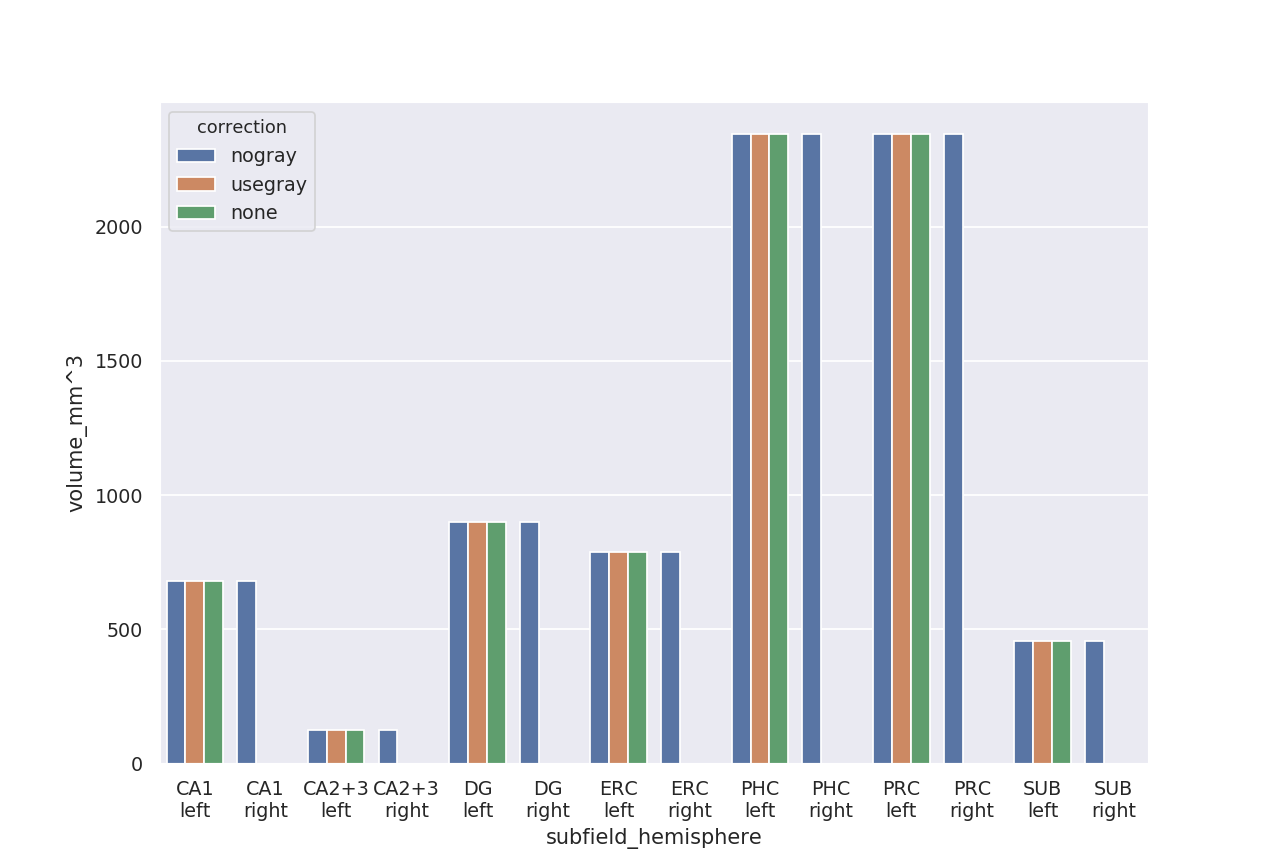

In [7]:
volume_frame['subfield_hemisphere'] = volume_frame.apply(
    lambda row: row['subfield'] + '\n' + row['hemisphere'],
    axis=1,
)

%matplotlib notebook
import seaborn
seaborn.set(font_scale=1.0)
seaborn.barplot(data=volume_frame.sort_values('subfield_hemisphere'),
                x='subfield_hemisphere',
                y='volume_mm^3',
                hue='correction');